In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Assuming you have downloaded the dataset and saved it as "car_data.csv"
file_path = "data eda.csv"
car_data = pd.read_csv(file_path)

In [7]:
# (i) Checking the types of data of all the features
print("Data Types:")
print(car_data.dtypes)

Data Types:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [8]:
# (ii) Dropping irrelevant columns
# Specify the irrelevant columns to be dropped
irrelevant_columns = ['Transmission Type', 'Driven_Wheels', 'Number of Doors']
car_data = car_data.drop(columns=irrelevant_columns, axis=1)

# Print the updated DataFrame
print("\nDataFrame after dropping irrelevant columns:")
print(car_data.head())


DataFrame after dropping irrelevant columns:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders                        Market Category Vehicle Size  \
0               6.0  Factory Tuner,Luxury,High-Performance      Compact   
1               6.0                     Luxury,Performance      Compact   
2               6.0                Luxury,High-Performance      Compact   
3               6.0                     Luxury,Performance      Compact   
4               6.0                                 Luxury      Compact   

  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0         Coupe           26      

In [9]:
# (iii) Processing missing values
# Check for missing values
missing_values = car_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Market Category     3742
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


In [32]:
# (iv) Processing null values
# Impute null values based on the strategy (e.g., mean, median, mode)
# Here, we'll use the mean for numerical columns and mode for categorical columns
for column in car_data.columns:
    if car_data[column].dtype == 'object':
        car_data[column].fillna(car_data[column].mode()[0], inplace=True)
    else:
        car_data[column].fillna(car_data[column].mean(), inplace=True)

print("\nDataFrame after processing null values:")
print(car_data.head())


DataFrame after processing null values:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders                        Market Category Vehicle Size  \
0               6.0  Factory Tuner,Luxury,High-Performance      Compact   
1               6.0                     Luxury,Performance      Compact   
2               6.0                Luxury,High-Performance      Compact   
3               6.0                     Luxury,Performance      Compact   
4               6.0                                 Luxury      Compact   

  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0         Coupe           26        19 

In [10]:
# (iii) Processing missing values
# Check for missing values
missing_values = car_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Market Category     3742
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


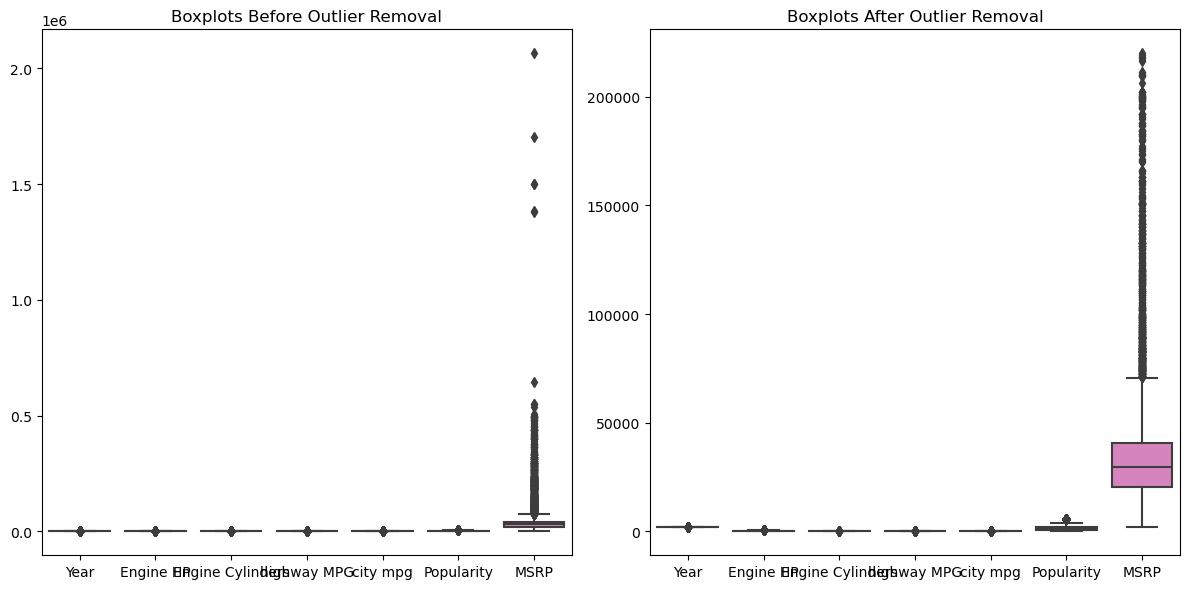

In [11]:
# (v) Removing outliers
# Define a function to remove outliers using Z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores < threshold).all(axis=1)]

# Specify the numerical columns for outlier removal
numerical_columns = car_data.select_dtypes(include=[np.number]).columns

# Apply the remove_outliers_zscore function to numerical columns
car_data_no_outliers = car_data.copy()
car_data_no_outliers[numerical_columns] = remove_outliers_zscore(car_data[numerical_columns])

# Visualize boxplots before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=car_data[numerical_columns])
plt.title('Boxplots Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=car_data_no_outliers[numerical_columns])
plt.title('Boxplots After Outlier Removal')

plt.tight_layout()
plt.show()